In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

1.a)  Utilizando seaborn.objects, graficar la curva de la expectativa de vida en Argentina en
 funcion del año, completando el siguiente codigo.
 
Sugerencia: recordar de la practica
 anterior como filtrar datos de un dataset.

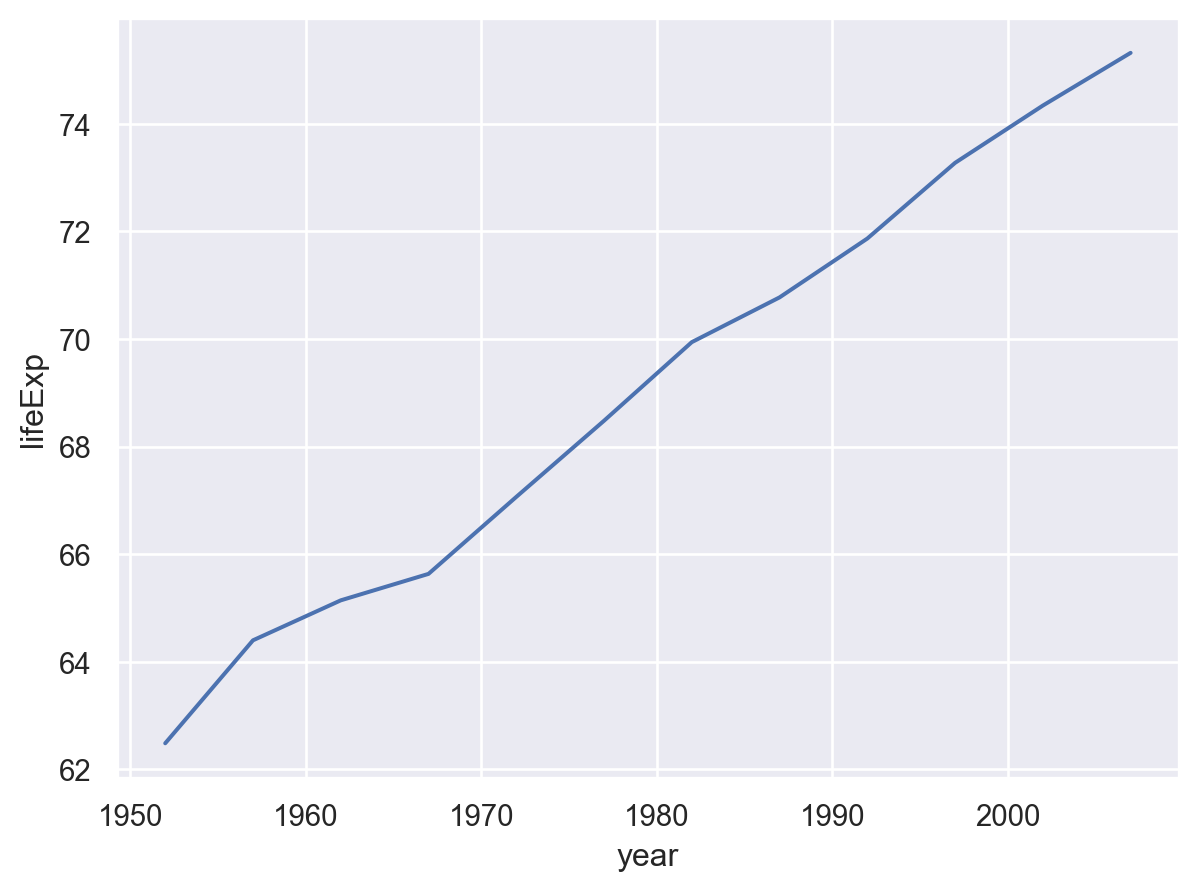

In [3]:
from gapminder import gapminder
import seaborn.objects as so
datosArgentina = gapminder [gapminder['country'] == 'Argentina']
(
 so.Plot(data = datosArgentina, x = "year", y = "lifeExp")
 .add(so.Line())
)

1.a con otros datos)

In [4]:
datosArgentina = pd.read_excel("/Users/Usuario/Desktop/LDD/EDV.xlsx") 
datosArgentina.head ()


,Año,Esperanza de Vida
0,2021,75.39
1,2020,75.89
2,2019,77.28
3,2018,77.00
4,2017,76.83


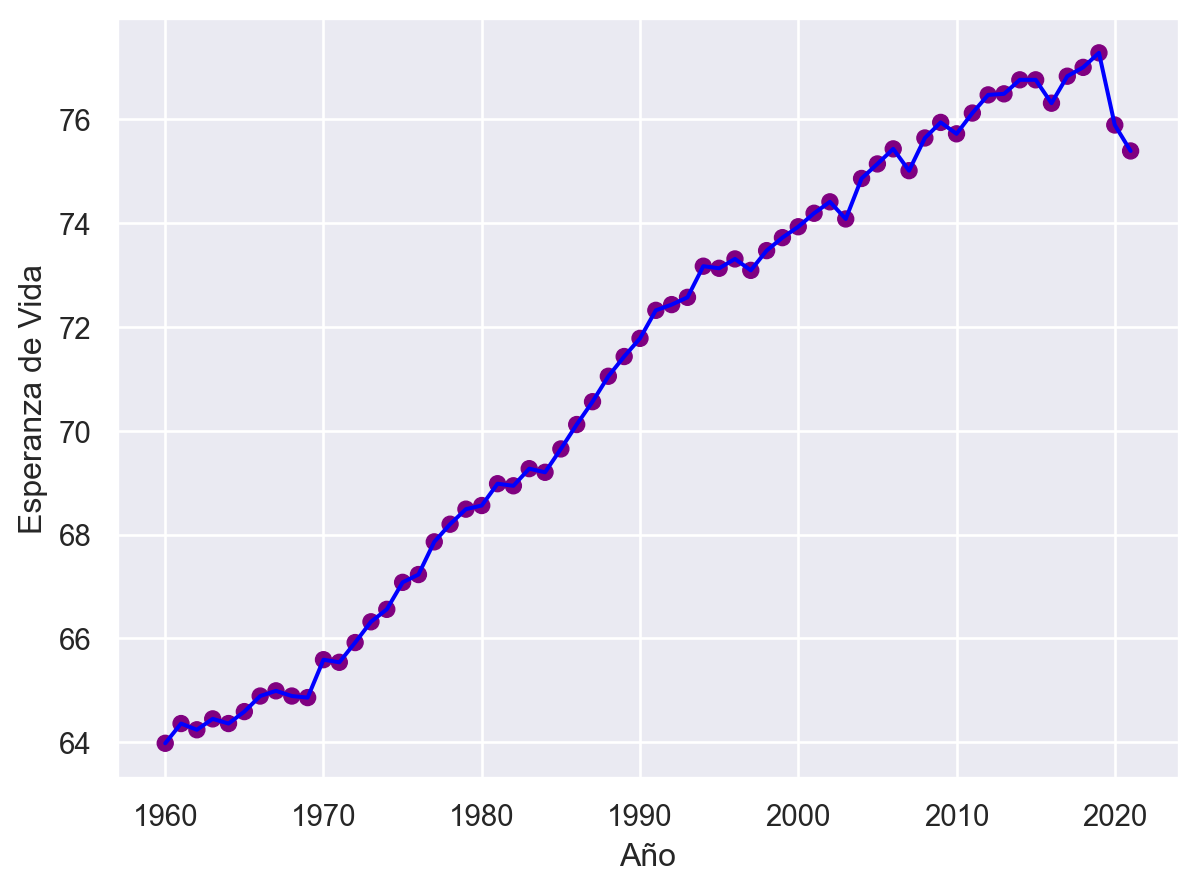

In [5]:
(
 so.Plot(data = datosArgentina, x = "Año", y = "Esperanza de Vida")
 .add(so.Dot(color= "purple"))
 .add(so.Line(color= "blue"))
)

1.b) Realizar un nuevo grafico donde puedan verse las curvas de la expectativa de vida de los
 paises de America en funcion del año, una curva por cada pais.

 Sugerencia: utilizar los parametros group = ??? o color = ???. ¿Cual es la diferencia
 entre los dos?

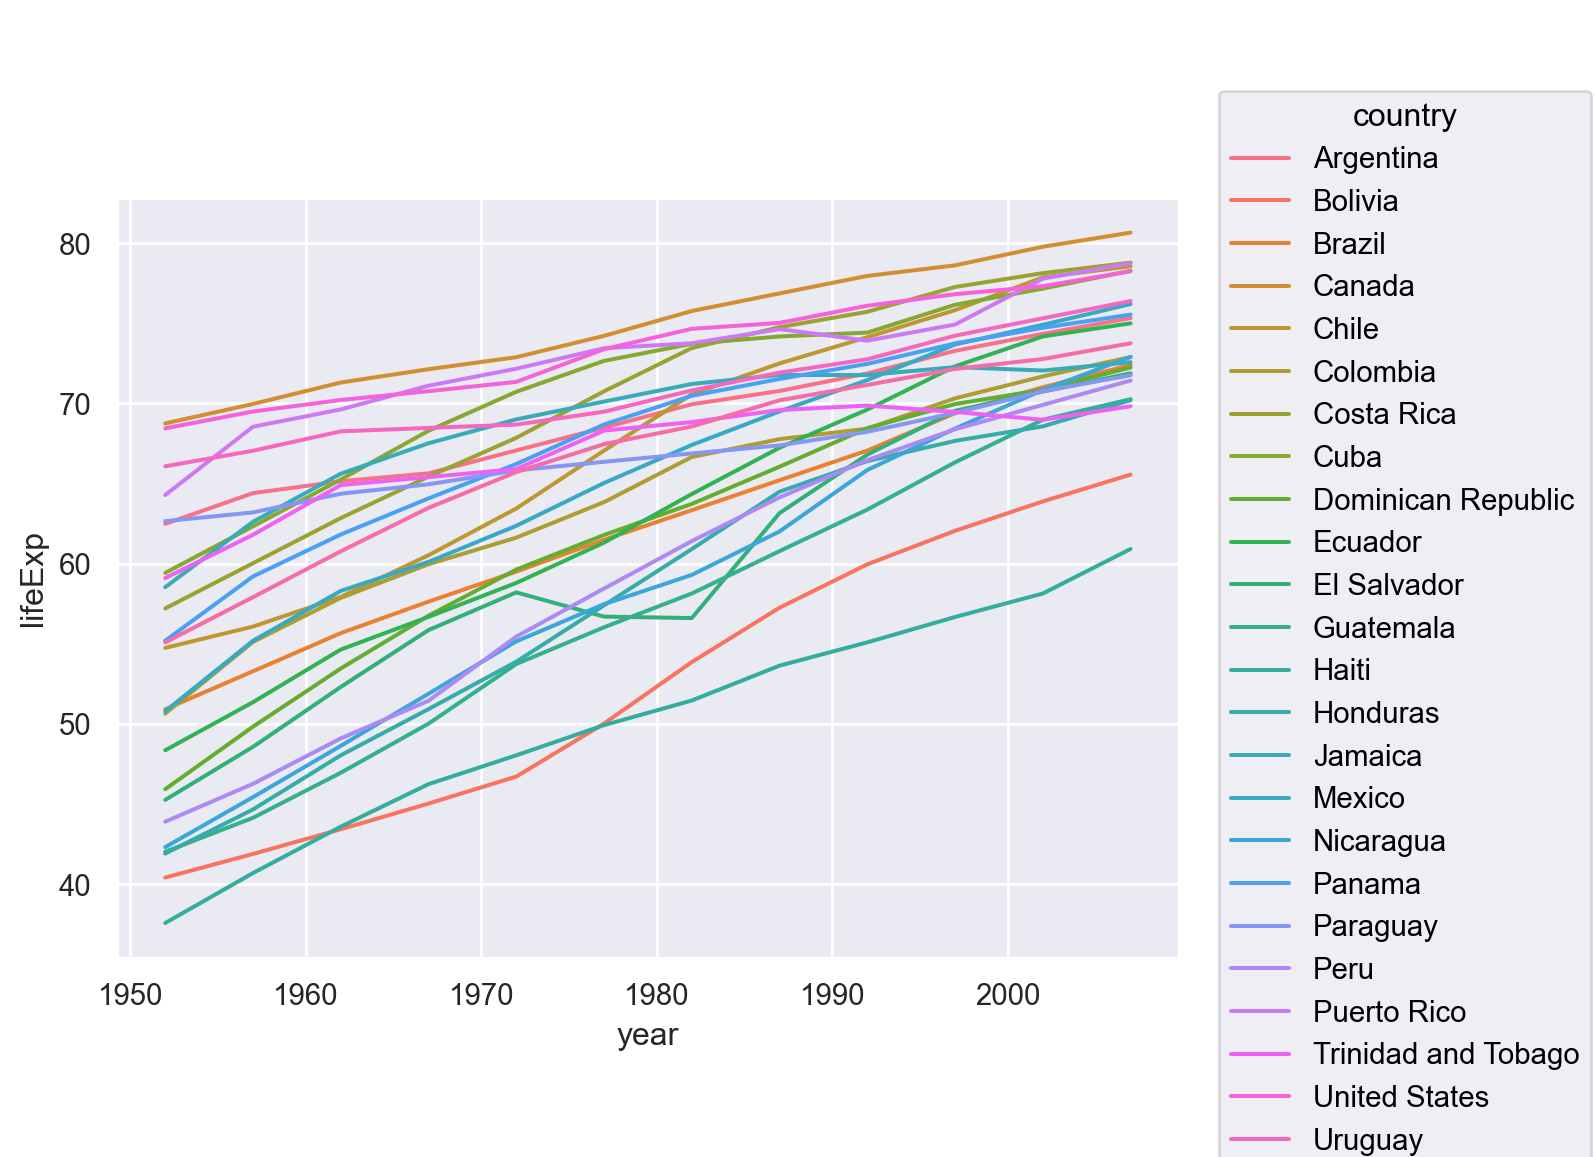

In [6]:
datosAmerica = gapminder [gapminder['continent'] == 'Americas']
(
 so.Plot(data = datosAmerica, x = "year", y = "lifeExp", color = "country")
 .add(so.Line())

)

1.c)  Queremos agregar al grafico del item anterior una curva de tendencia lineal utilizando el
 metodo .add(so.Line(), so.PolyFit(1)). 
 
 ¿Cual de las siguientes dos formas de agrupar los datos es la forma correcta?
 Explicar la diferencia entre los dos codigos

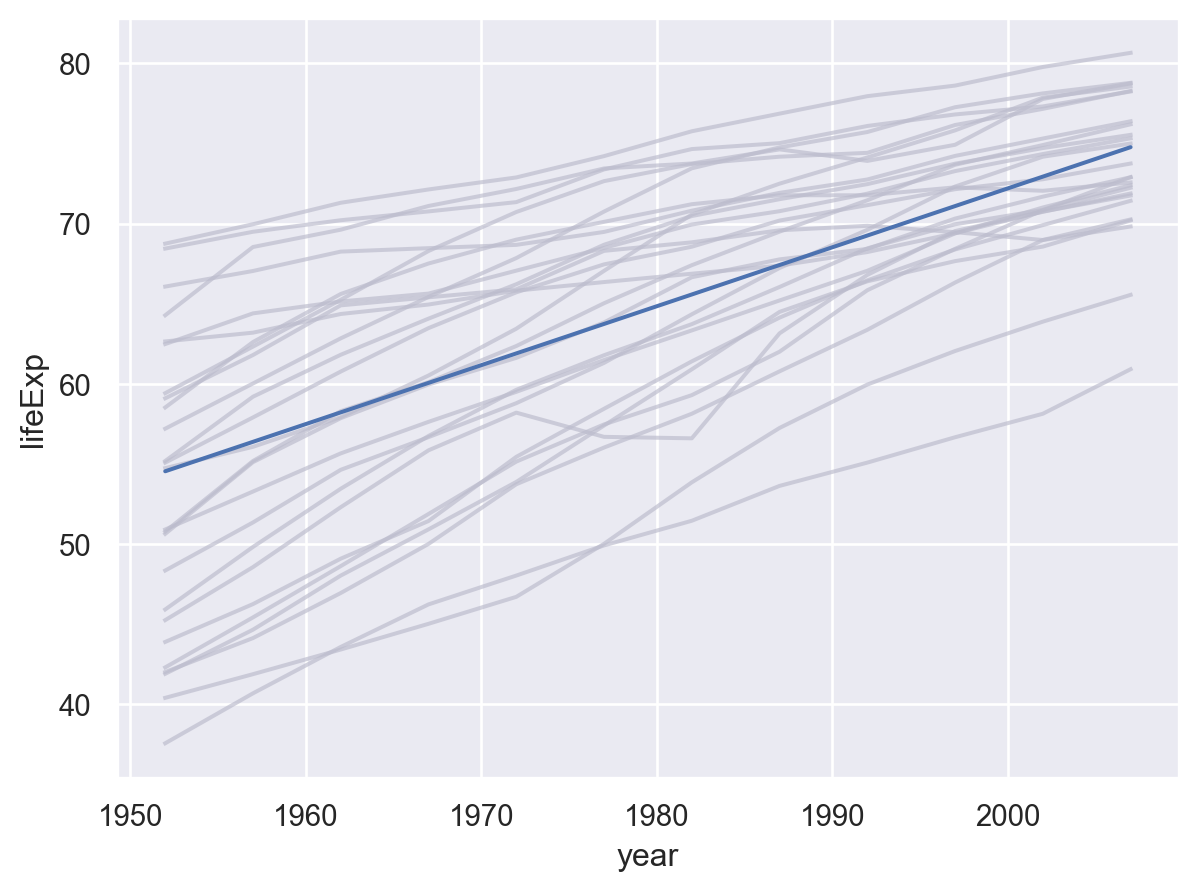

In [7]:
 # Codigo 1
""""(
 so.Plot(data = datosAmerica, x= "year", y= "lifeExp", group = "country")
 .add(so.Lines(color="#bbca"))
 .add(so.Line(), so.PolyFit(1))
)"""
 # Codigo 2
(
 so.Plot(data = datosAmerica, x= "year", y= "lifeExp")
 .add(so.Lines(color="#bbca"), group = "country")
 .add(so.Line(), so.PolyFit(1))
)

1.d) Realizar el siguiente grafico, con las curvas de expectativa de vida agrupadas por continente. 

Sugerencias: ¿que hace el metodo facet() de seaborn.objects.Plot()? ¿Y el parametro wrap = ??? de facet()?

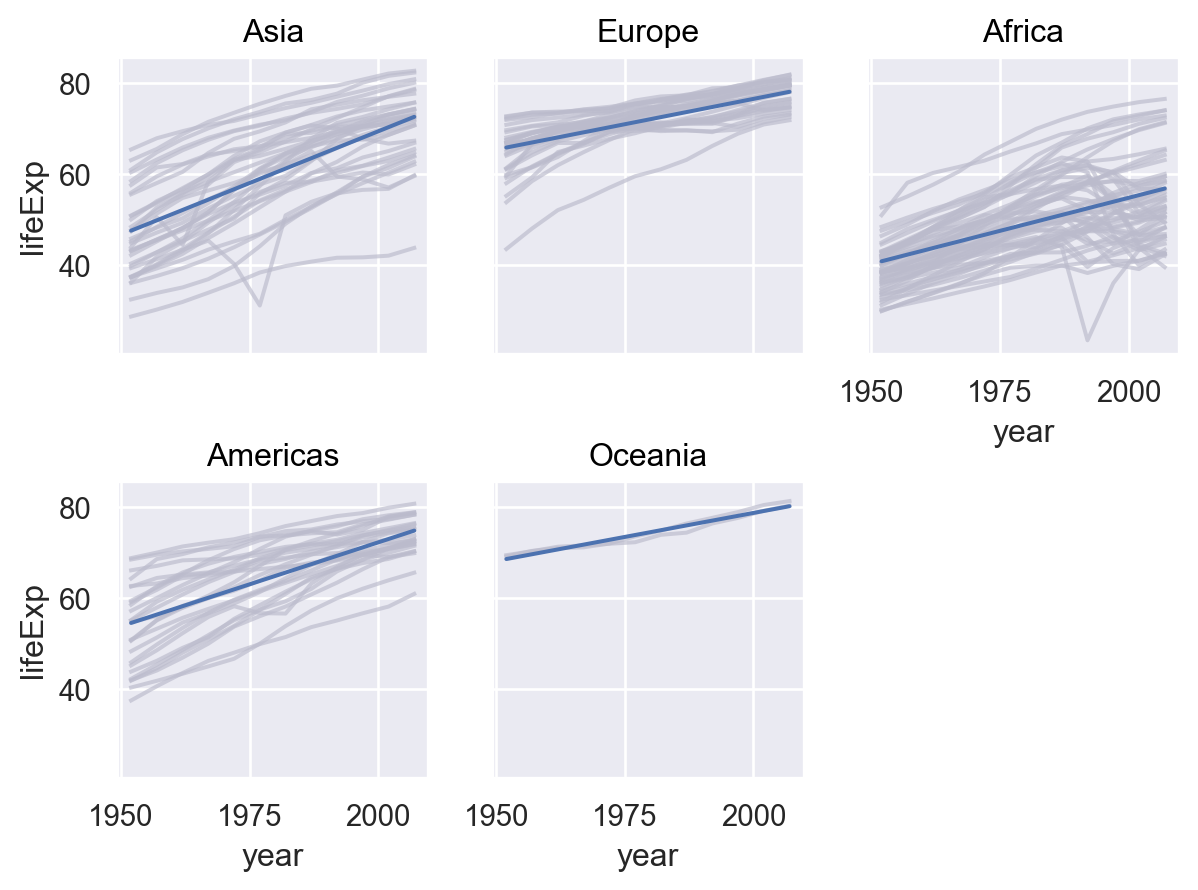

In [8]:

mundo = (so.Plot(gapminder, "year", "lifeExp")
.add(so.Lines(color="#bbca"), group = "country")
.add(so.Line(), so.PolyFit(1))
)
mundo.facet("continent", wrap = 3)

2) En los siguientes ejercicios vamos a trabajar con el dataset penguins disponible en la biblioteca
 seaborn.

 ¿Cuantas filas y columnas hay en el dataset penguins?

In [9]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.info()
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


3)  Como vimos en el Ejercicio 1c, si asignamos una codificacion (o mapeo) al definir un Plot(),
 el mapeo se asigna en todas las capas de marcas (objetos mark).
 
 En cambio, si asignamos una
 codificacion dentro del metodo add() de una marca, mapeo se realiza solo en esa capa.
 
 Por ultimo, si asignamos un parametro de la marca, el valor se asigna directamente (ver grafico).

 ¿Que resultado esperan para el siguiente grafico? 
 ¿Cuales codificaciones se pasan de Plot() a Dot() y cuales no pueden pasarse?
 
 ¿Cuales codificaciones se establecen en Dot()? ¿Cuales variables estan asignadas directamente en Dot()?
 ¿De que color van a pintarse los puntos?

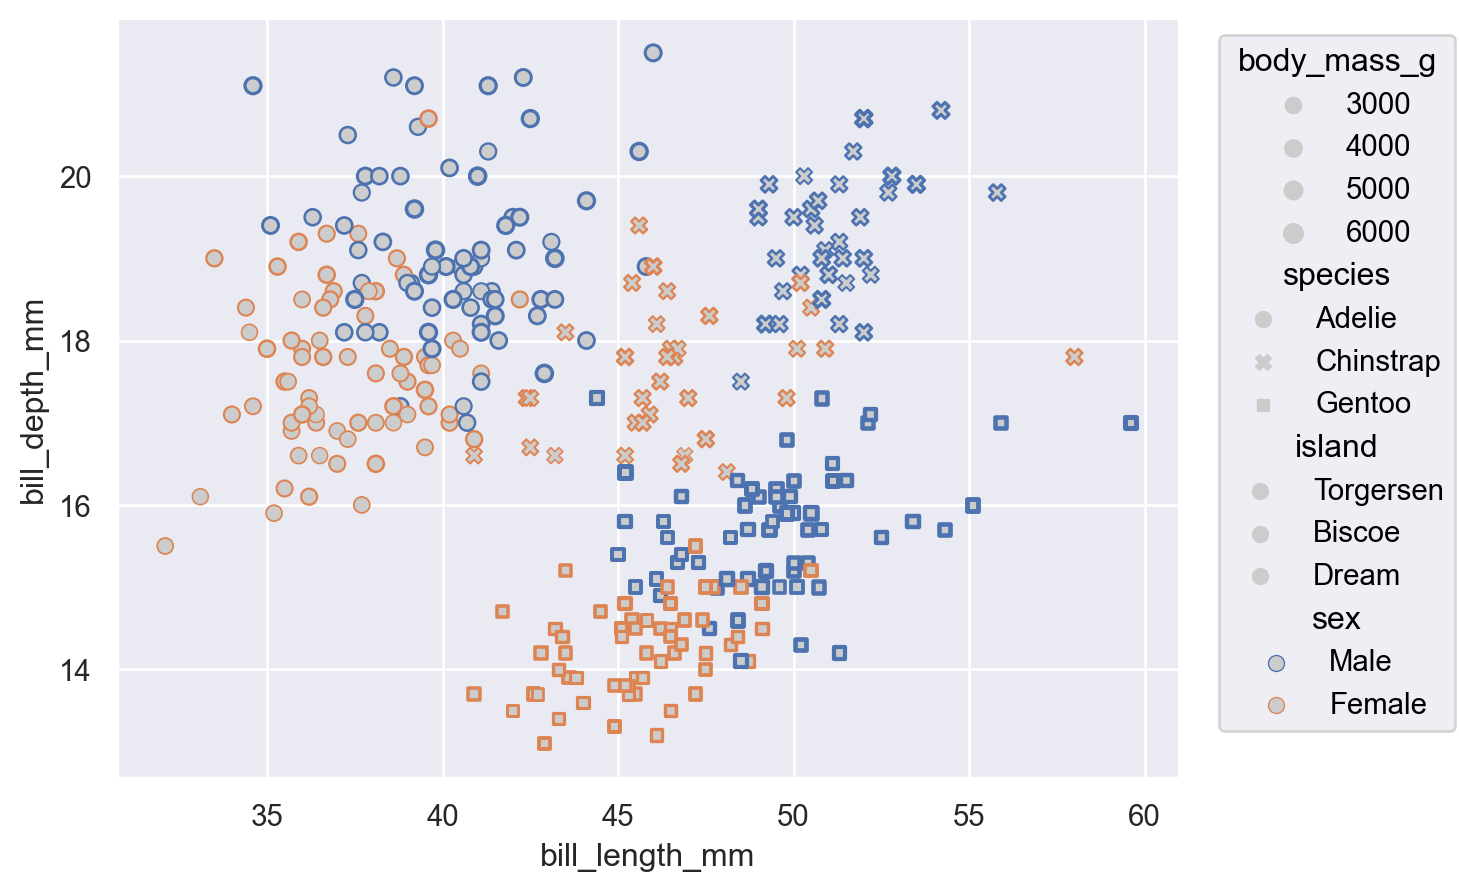

In [10]:
(
so.Plot(
penguins, x="bill_length_mm", y="bill_depth_mm",
edgewidth="body_mass_g", marker = "species",
linestyle = "island", color = "species"
)
.add(so.Dot(color=".8"), edgecolor="sex")
)

4.a) Hacer un grafico de dispersion de bill_depth_mm (en el eje x) vs. bill_length_mm (en el eje y).

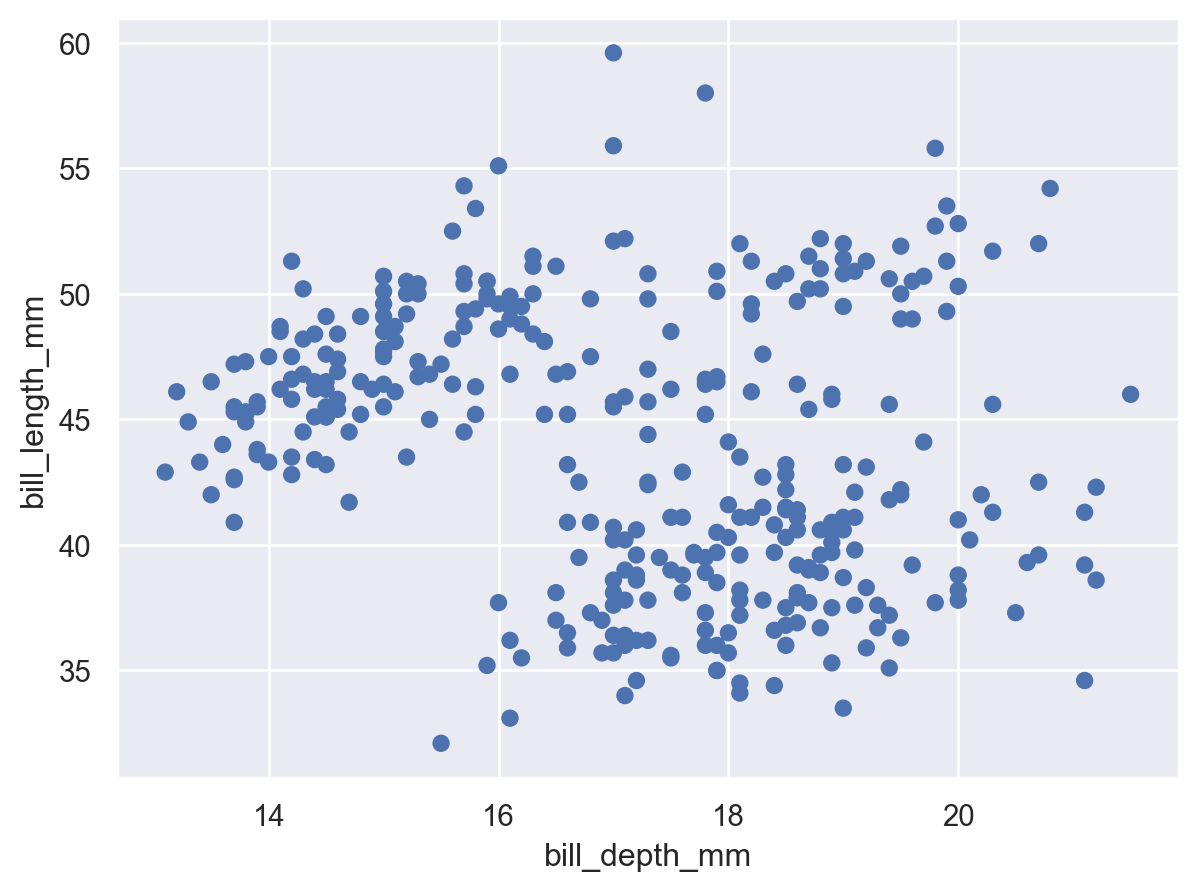

In [11]:
(
    so.Plot(
        penguins, x="bill_depth_mm", y="bill_length_mm",
        
    )
        .add(so.Dot())
        
    
)

4.b y 4.c) ¿Distinguen grupos distintos de puntos en el grafico? ¿A que puede deberse?

Introducir alguna modificacion en el grafico anterior para verificar o refutar su conjetura
del item anterior.

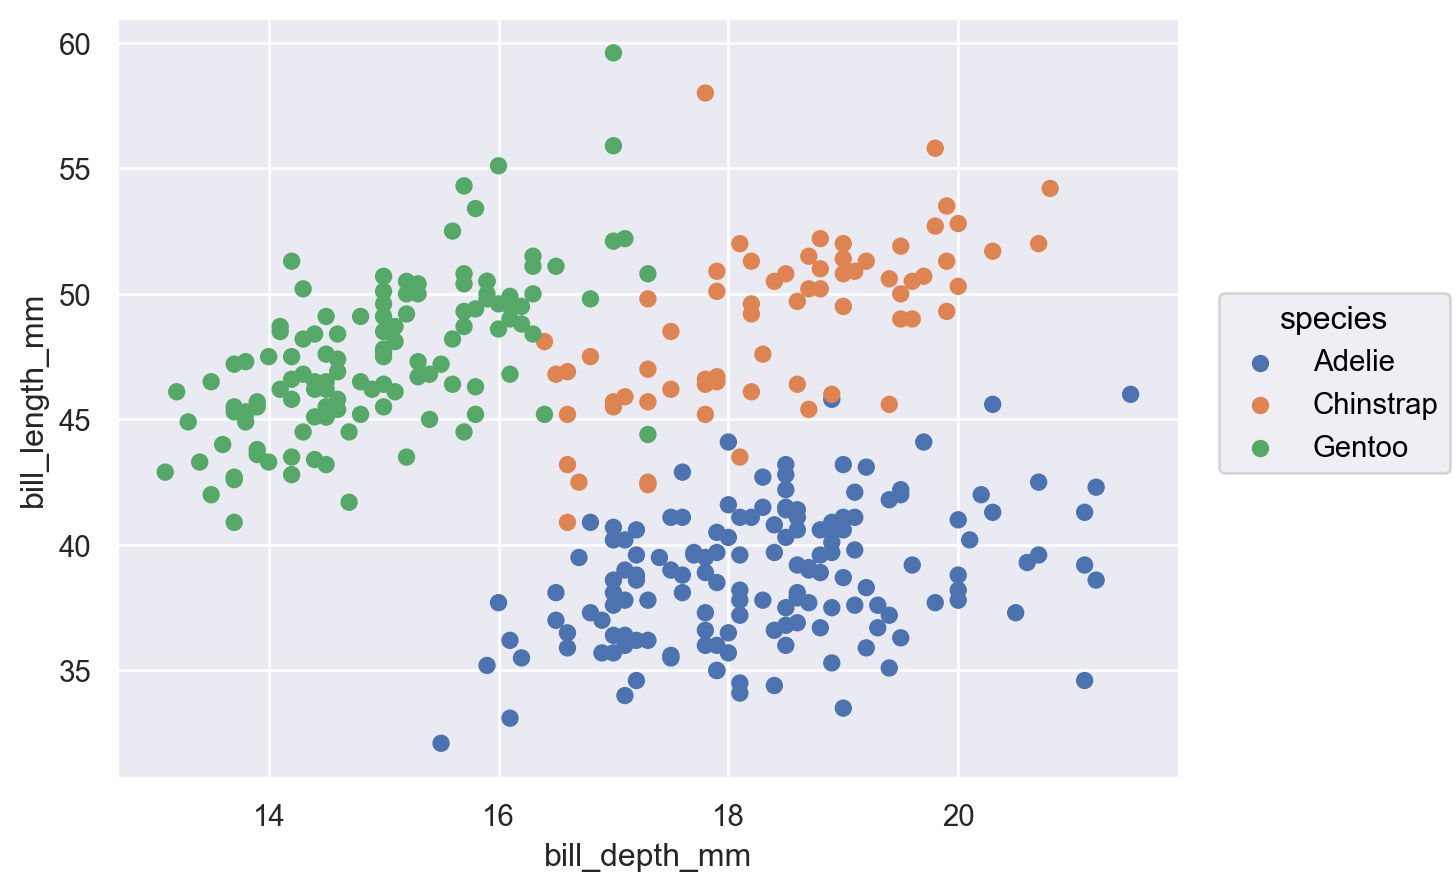

In [12]:
(
    so.Plot(
        penguins, x="bill_depth_mm", y="bill_length_mm",
        color = 'species'
        
    )
        .add(so.Dot())
        
    
)

5.a)  Rehacer el grafico del ejercicio 4, coloreando los puntos segun el sexo. ¿Que se observa?

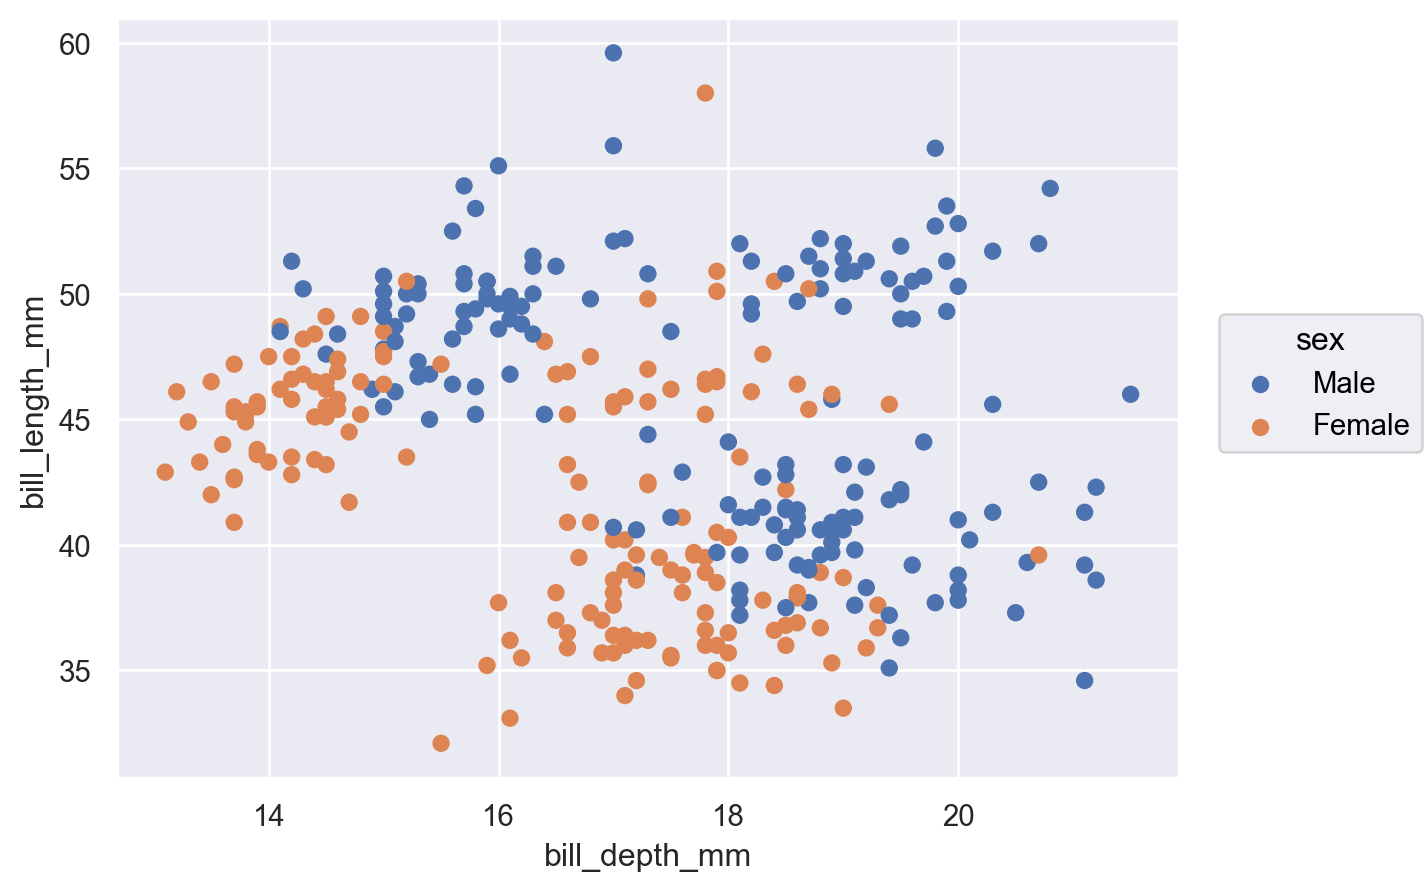

In [13]:
(
    so.Plot(
        penguins, x="bill_depth_mm", y="bill_length_mm",
        color = "sex"
        
    )
        .add(so.Dot())
        
    
)

5.b) Usando la funcion facet() separar el grafico del item anterior en tres subgraficos, uno
 para cada especie.

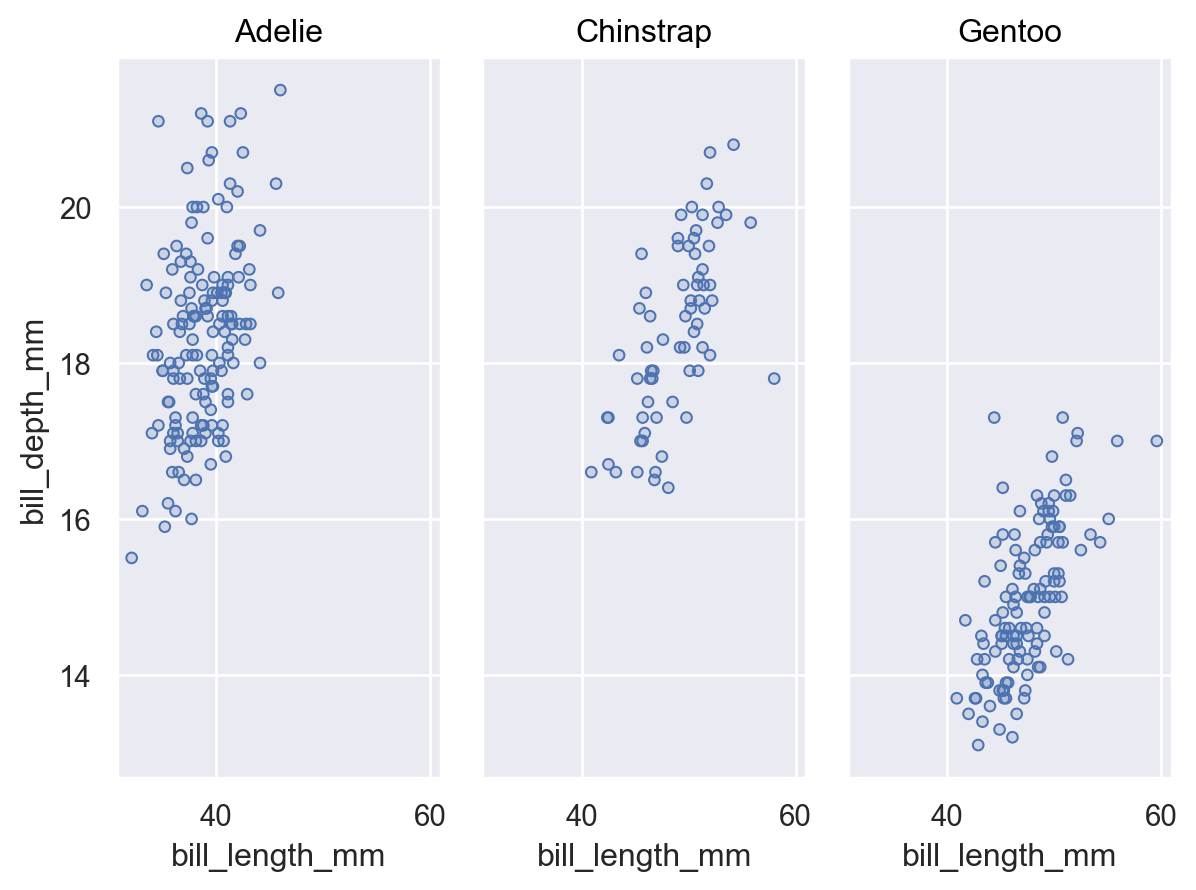

In [14]:
penguins = so.Plot(penguins, "bill_length_mm", "bill_depth_mm").add(so.Dots())
penguins.facet("species")

6.a) ¿Cuantos pingüinos hay en cada isla en la base de datos? Recordar los comandos groupby() y size() de la practica anterior.

In [15]:
penguins = sns.load_dataset("penguins")
penguins.groupby("island").size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

6.b)  Realizar un grafico de barras con la cantidad de pingüinos en cada isla, completando el siguiente codigo.

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

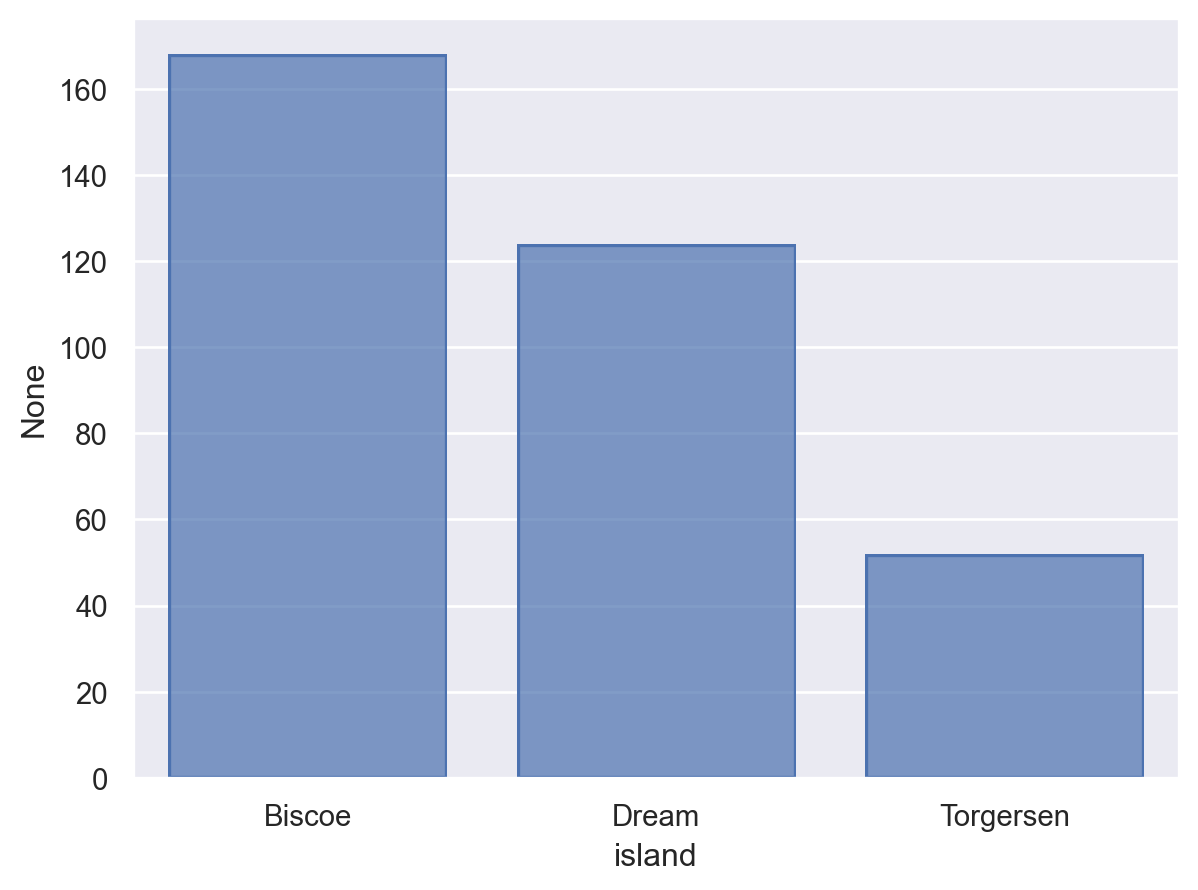

In [16]:
pinguinos_por_isla = penguins.groupby('island').size()
display (pinguinos_por_isla)
(
 so.Plot(x=pinguinos_por_isla.index, y = pinguinos_por_isla)
 .add(so.Bar())
)

6.c)  El grafico que acabamos de hacer es un histograma categorico (usamos una variable categorica en el eje X). 
 
 Podemos realizar el mismo grafico usando la funcion Hist() para contar automaticamente
 las cantidades (sin definir una variable pinguinos_por_isla)
 
 Completar el siguiente codigo.

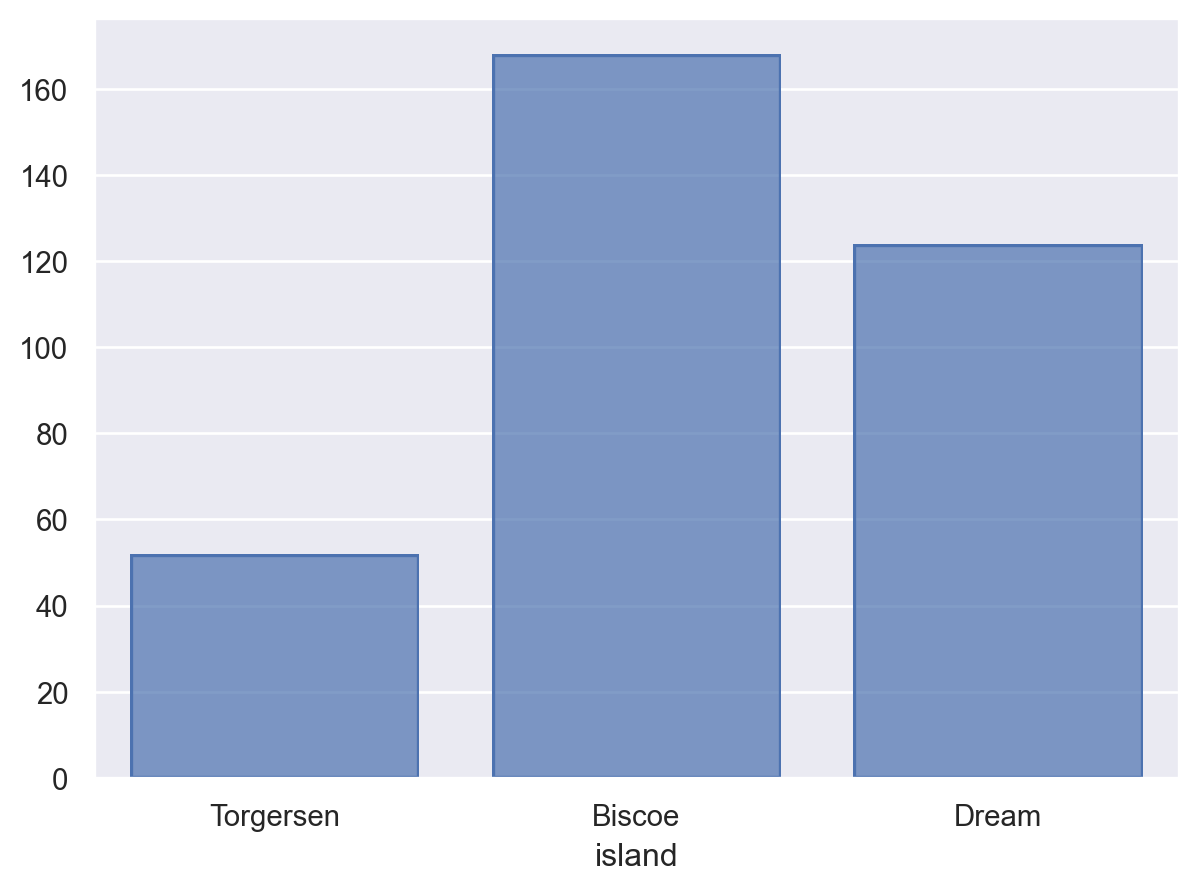

In [17]:
(
 so.Plot(data = penguins, x = "island")
 .add(so.Bar(), so.Hist())
)

6.e) Queremos ver en un grafico cuantos pingüinos de cada especie hay en cada isla, ¿como podemos hacerlo?

Si usan un grafico de barras, pueden utilizar la funcion dodge() para hacer varias barras por categoria.

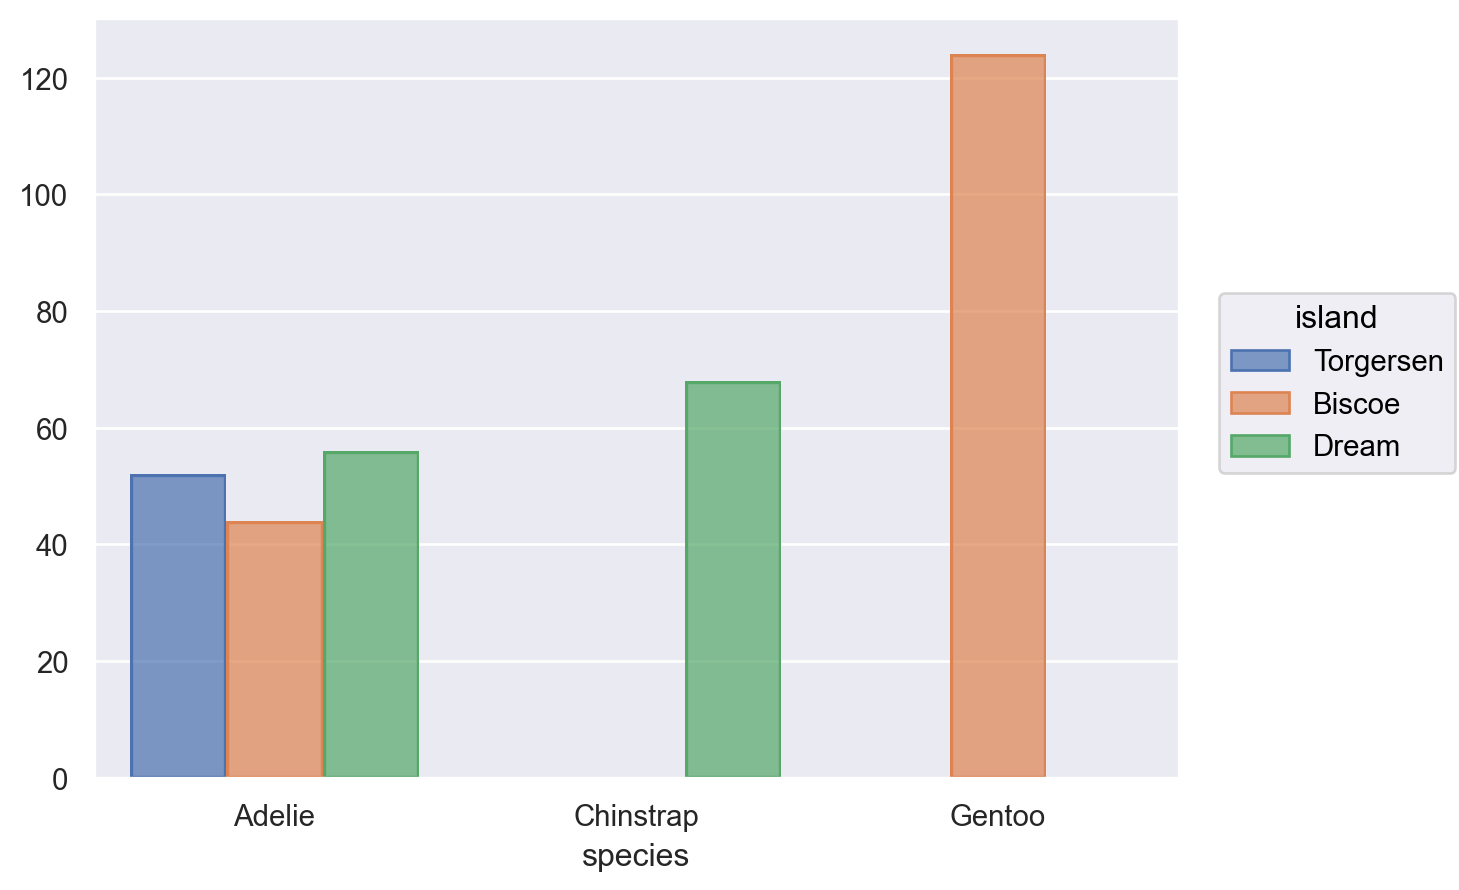

In [18]:
(
 so.Plot(data = penguins, x = "species", color = "island")
 .add(so.Bar(), so.Hist(), so.Dodge(empty="fill"))
)

 7) Realizar un histograma de la cantidad de pingüinos en funcion del tamaño del ala (variable
 flipper_length_mm).
 
 A partir del grafico, estimar el valor minimo, maximo, la media y la mediana.
 
 Verificar sus estimaciones utilizando los comandos apropiados.

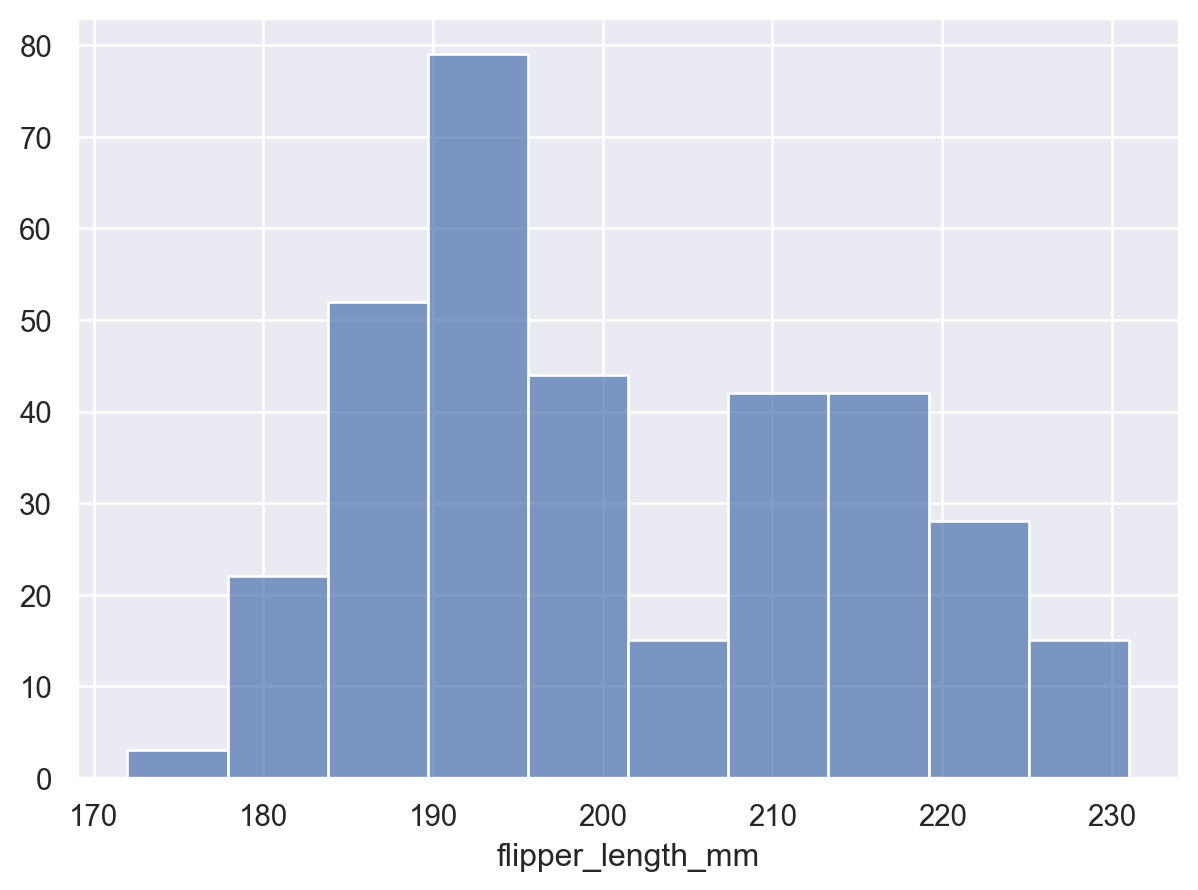

In [19]:
(
    so.Plot(data = penguins, x = "flipper_length_mm")
    .add(so.Bars(), so.Hist())
)


In [20]:
penguins["flipper_length_mm"].median()

197.0

In [21]:
penguins["flipper_length_mm"].mean()

200.91520467836258

In [22]:
penguins["flipper_length_mm"].min()

172.0

In [23]:
penguins["flipper_length_mm"].max()

231.0

 8.a) Calcular distintos estadisticos de la variable bill_depth_mm (minimo, maximo, media, ...).

In [24]:
penguins["bill_depth_mm"].min()

13.1

In [25]:
penguins["bill_depth_mm"].max()

21.5

In [26]:
penguins["bill_depth_mm"].median()

17.3

In [27]:
penguins["bill_depth_mm"].mean()

17.151169590643278

8.b) Segun lo observado en el ejercicio 4, ¿esos valores varian segun la especie?

¿Como podemos usar graficos BoxPlot para ver la relacion entre species y bill_depth_mm?

v ((Recap Ejercicio 4)) v

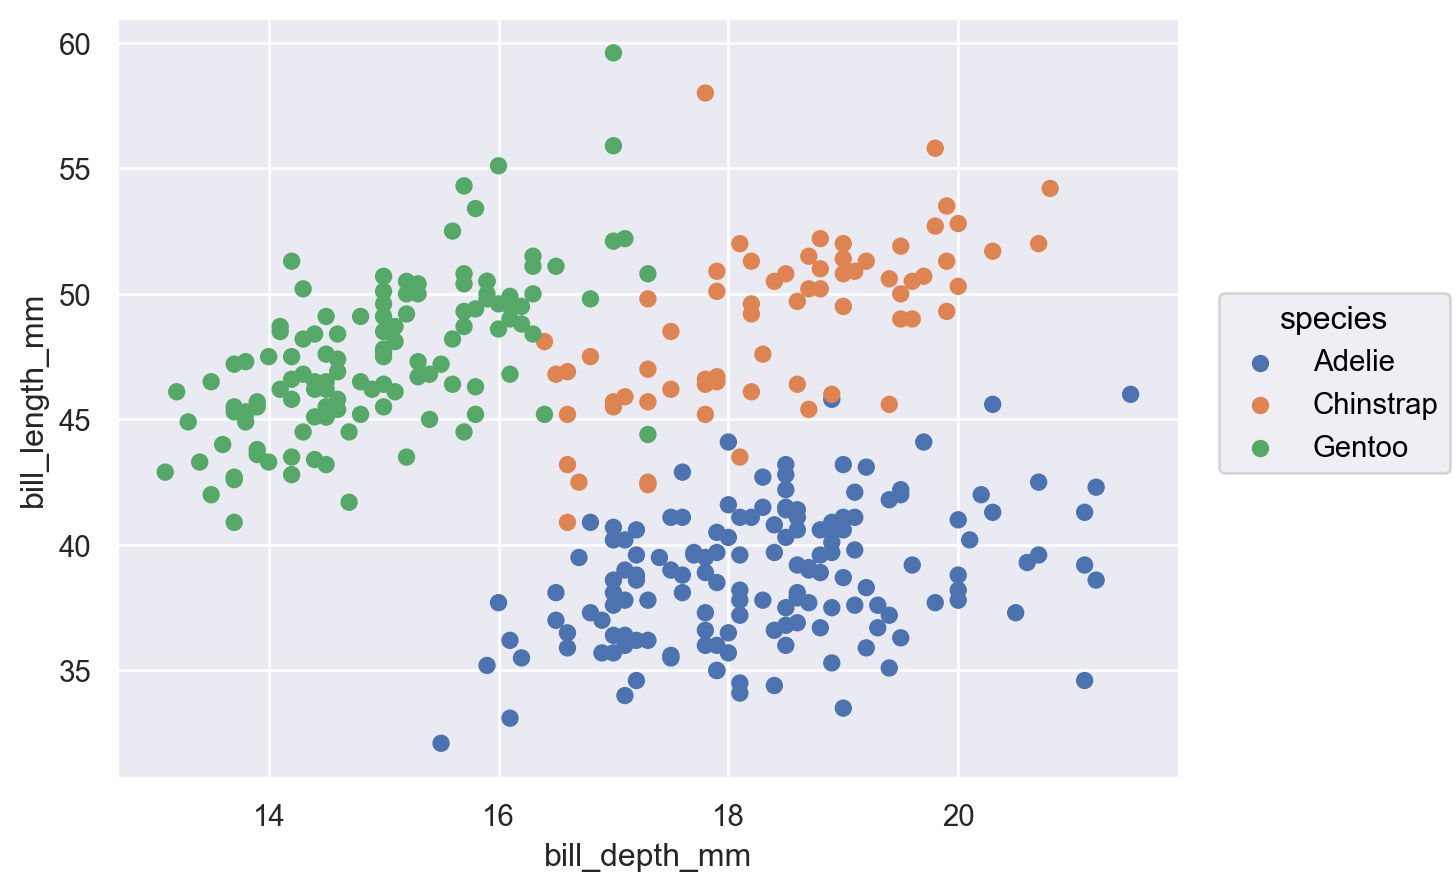

In [28]:
(
    so.Plot(
        penguins, x="bill_depth_mm", y="bill_length_mm",
        color = 'species'
        
    )
        .add(so.Dot())
        
    
)

<Axes: xlabel='species', ylabel='bill_depth_mm'>

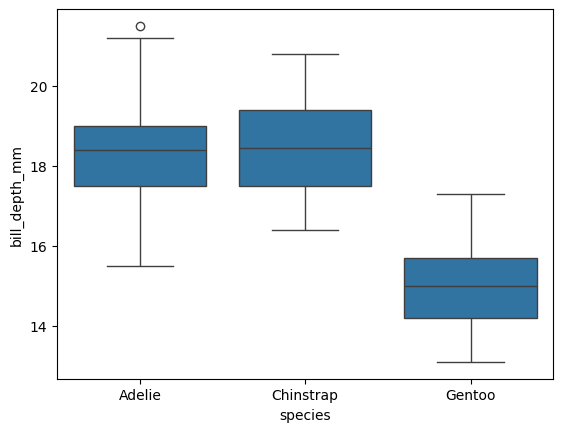

In [29]:
sns.boxplot(data = penguins, x="species", y = "bill_depth_mm")

 9.a) Rehacer el scatter plot del ejercicio 4, modificando el tamaño de los puntos segun el peso
 de cada pingüino, utilizando el parametro pointsize="???". ¿Que se observa?

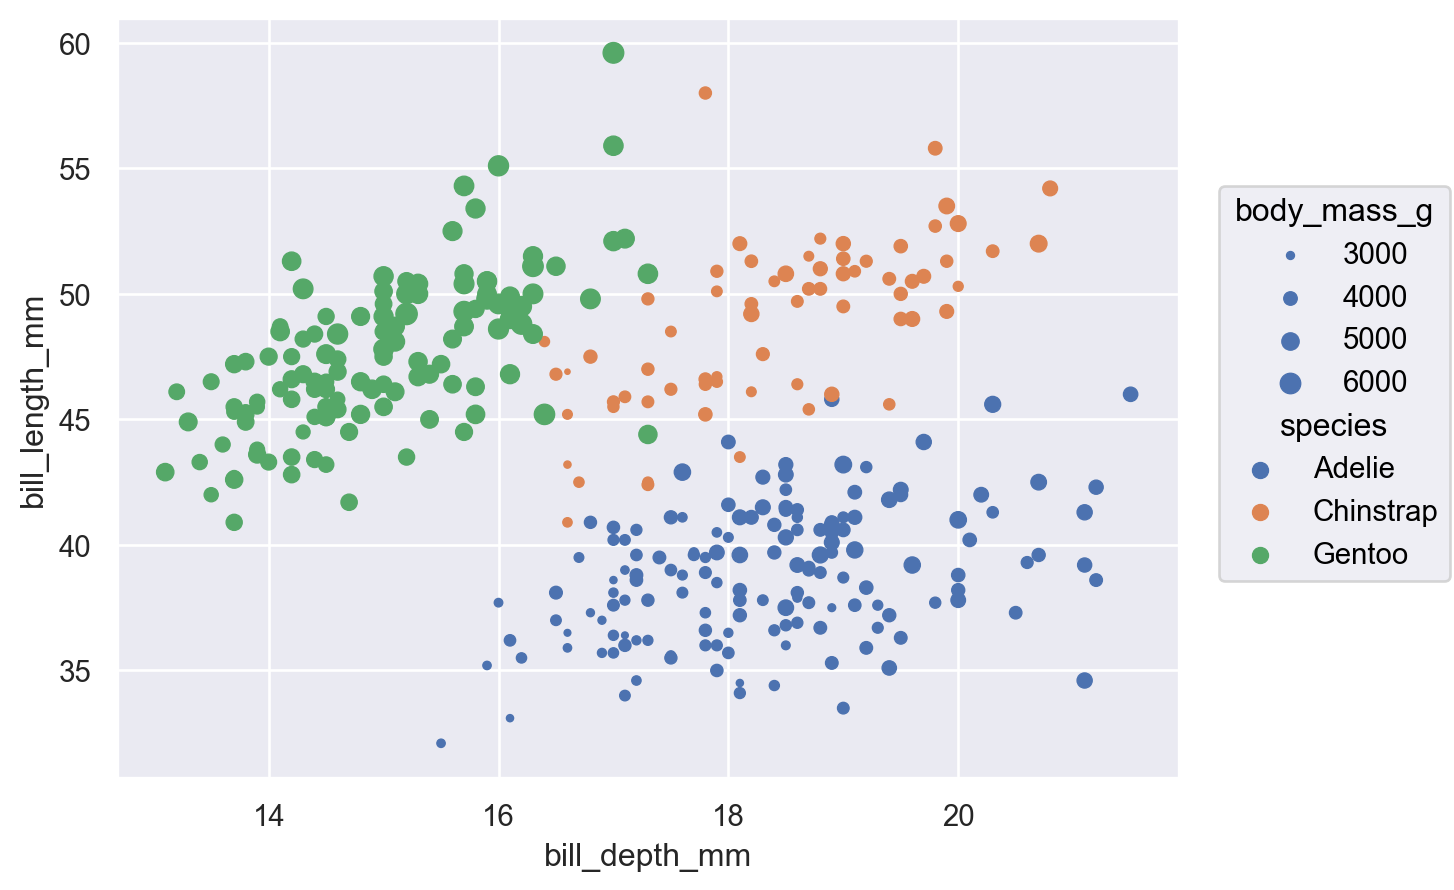

In [30]:
(
    so.Plot(
        penguins, x="bill_depth_mm", y="bill_length_mm",
        pointsize = "body_mass_g", color = "species"
        
    )
        .add(so.Dot())
        
    
)

 12) Hacé un grafico de barras que muestre la cantidad de paises hay en cada continente segun los
 datos de gapminder.


a) ¿Como podemos hacerlo calculando primero las cantidades y llamando a .add(so.Bar())?


continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

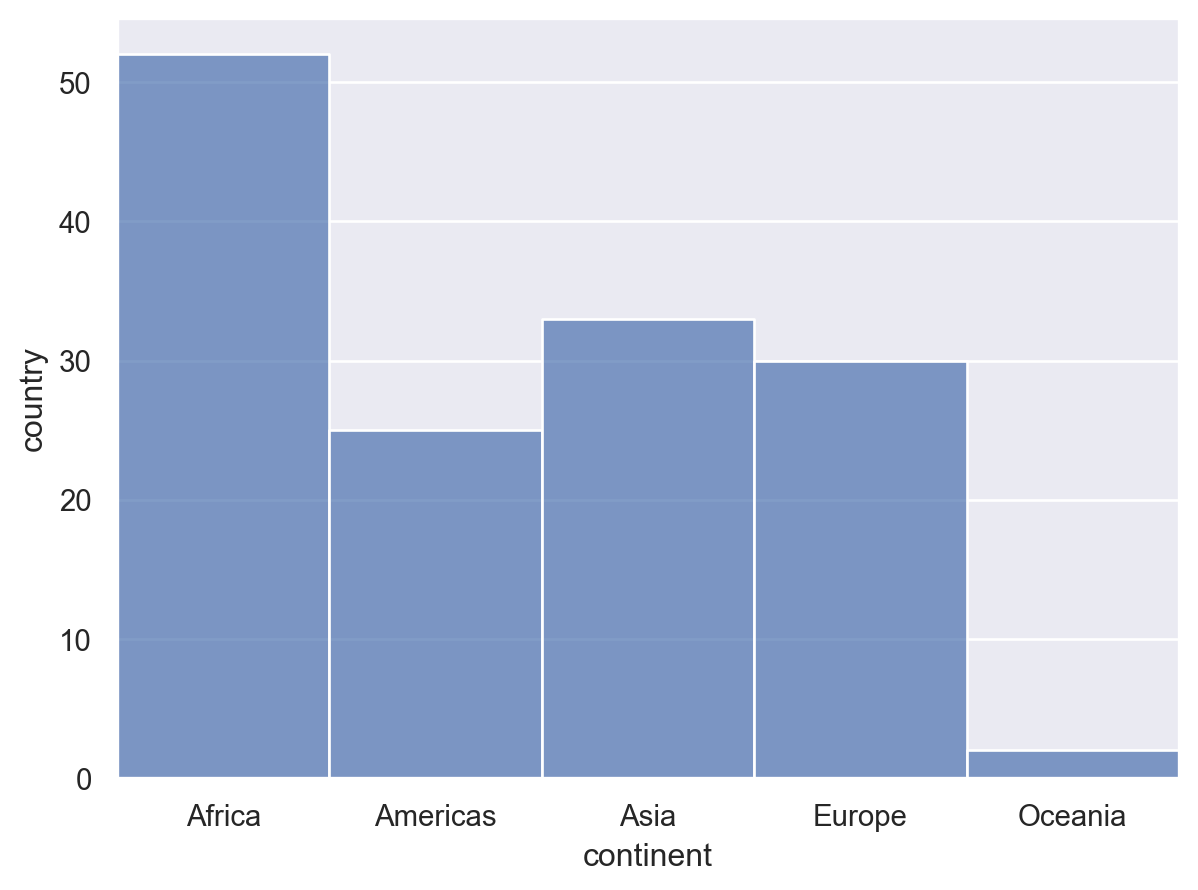

In [31]:
cantidad_de_paises = gapminder.groupby("continent")["country"].nunique()
display(cantidad_de_paises)

(
 so.Plot(x = cantidad_de_paises.index, y = cantidad_de_paises)
 .add(so.Bars())

)

 12.b) ¿Como podemos hacerlo utilizando so.Hist() para calcular las cantidades?

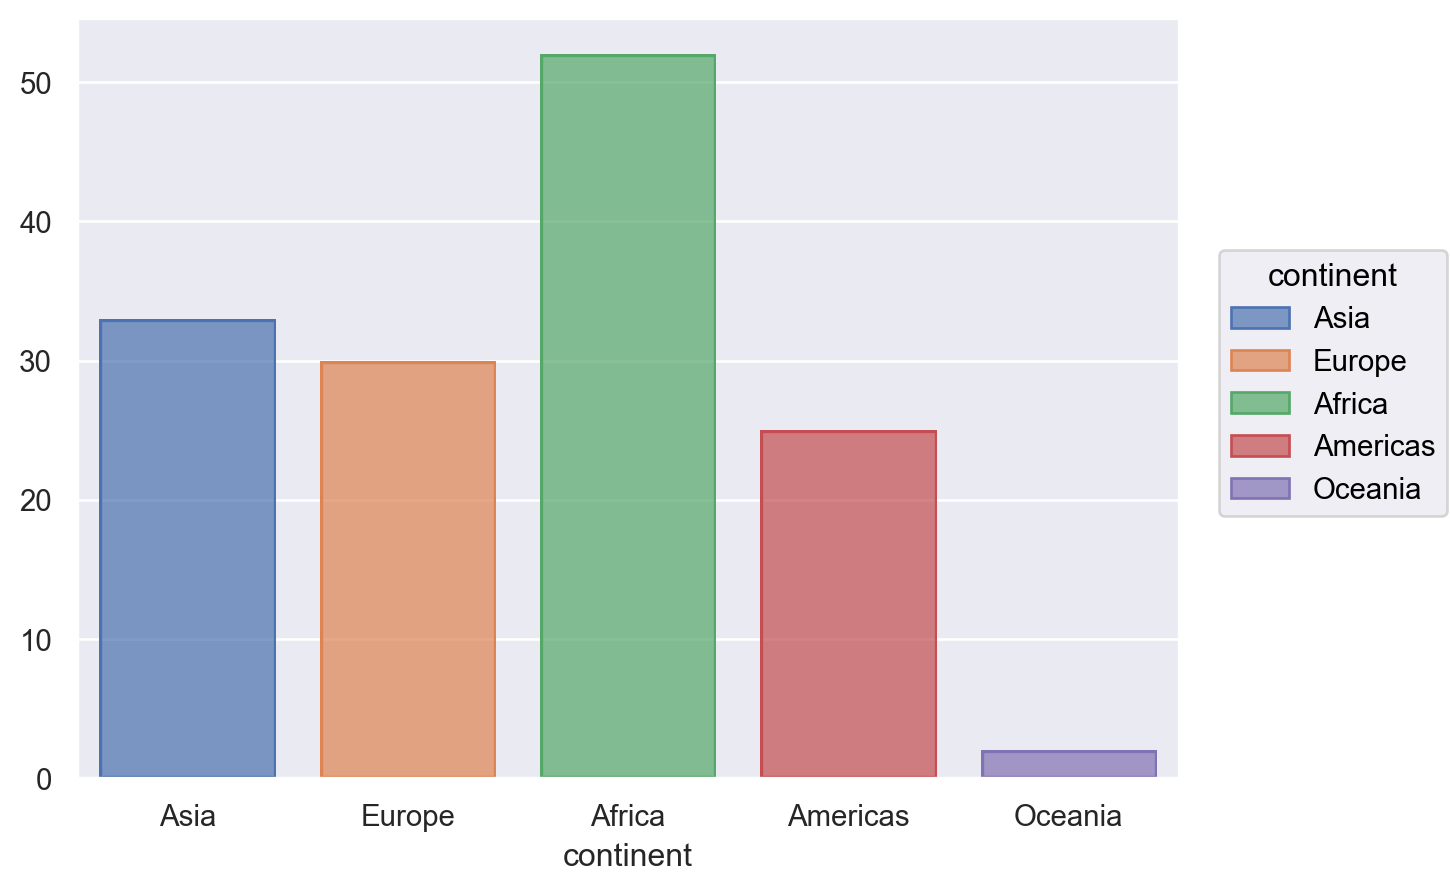

In [32]:

(
 so.Plot(data = gapminder[gapminder['year']== 2007], x = "continent", color = "continent")
 .add(so.Bar(), so.Hist())
)


 13) Queres investigar cómo varía la expectativa de vida entre los continentes.


<Axes: xlabel='continent', ylabel='lifeExp'>

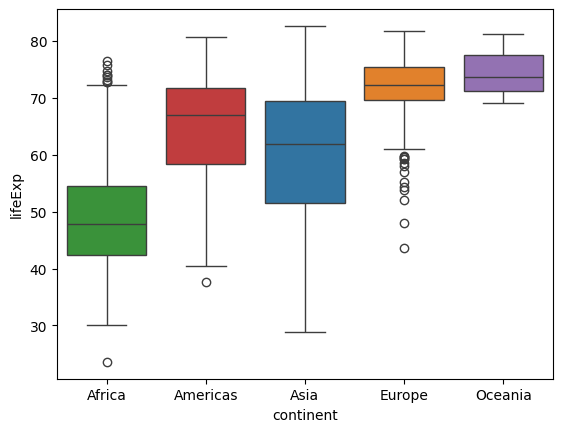

In [33]:
import seaborn as sns
sns.boxplot(gapminder, x="continent", y="lifeExp", order=sorted(["Africa", "Americas", "Asia", "Europe", "Oceania"]),
             hue = "continent")

In [34]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [35]:
Adelie = penguins[penguins["species"] == "Adelie"]

In [36]:
Adelie["body_mass_g"].mean()

3700.662251655629

In [38]:
Adelie_Dream = Adelie[Adelie["island"] == "Dream"]

In [39]:
Adelie_Dream.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
31,Adelie,Dream,37.2,18.1,178.0,3900.0,Male
32,Adelie,Dream,39.5,17.8,188.0,3300.0,Female
33,Adelie,Dream,40.9,18.9,184.0,3900.0,Male
34,Adelie,Dream,36.4,17.0,195.0,3325.0,Female


In [40]:
Adelie_Dream["body_mass_g"].mean()

3688.3928571428573

In [41]:
Dream = penguins[penguins["island"] == "Dream"]

In [42]:
Torgersen = penguins[penguins["island"] == "Torgersen"]

In [43]:
Biscoe = penguins[penguins["island"] == "Biscoe"]

In [45]:
Dream["body_mass_g"].std()

416.6441116370989

In [46]:
Torgersen["body_mass_g"].std()

445.10794020256765

In [47]:
Biscoe["body_mass_g"].std()

782.8557428627445

In [48]:
datosParcial = gapminder[(gapminder["country"] == "Argentina")|(gapminder["country"] == "Brazil") | (gapminder["country"] == "Chile") | (gapminder["country"] == "Uruguay")]


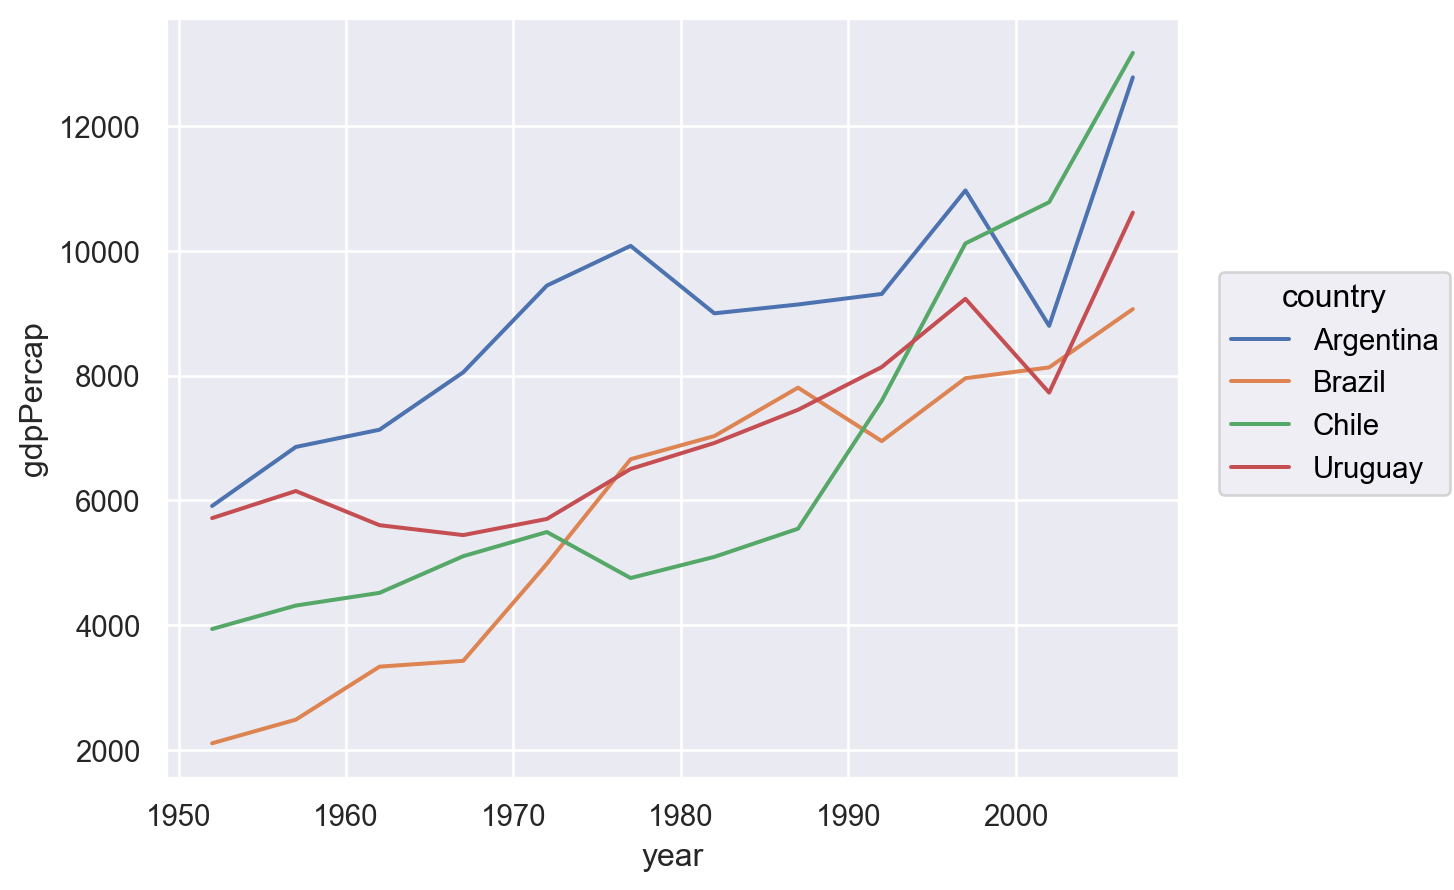

In [49]:
(
 so.Plot(data = datosParcial, x = "year", y = "gdpPercap", color = "country")
 .add(so.Line())
)